# Iris Species
![IRIS](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

**Context**

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems". It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris plant (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

This dataset became a typical test case for many statistical classification techniques in machine learning algorithms.

**Content**

The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).

**Prediction Task:** Class of Iris Species

# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
from pandas.plotting import scatter_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
sns.set_style("dark")
import warnings
warnings.filterwarnings('ignore')

# 2. Import dataset

In [2]:
dataset = pd.read_csv("../input/iris-dataset/iris.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
print(dataset.describe())
print("\n")
print(dataset.groupby('class').size())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# 3. Exploratory data analysis of IRIS dataset

Text(0.5, 0.98, 'Visualizing Multidimensional Relationships')

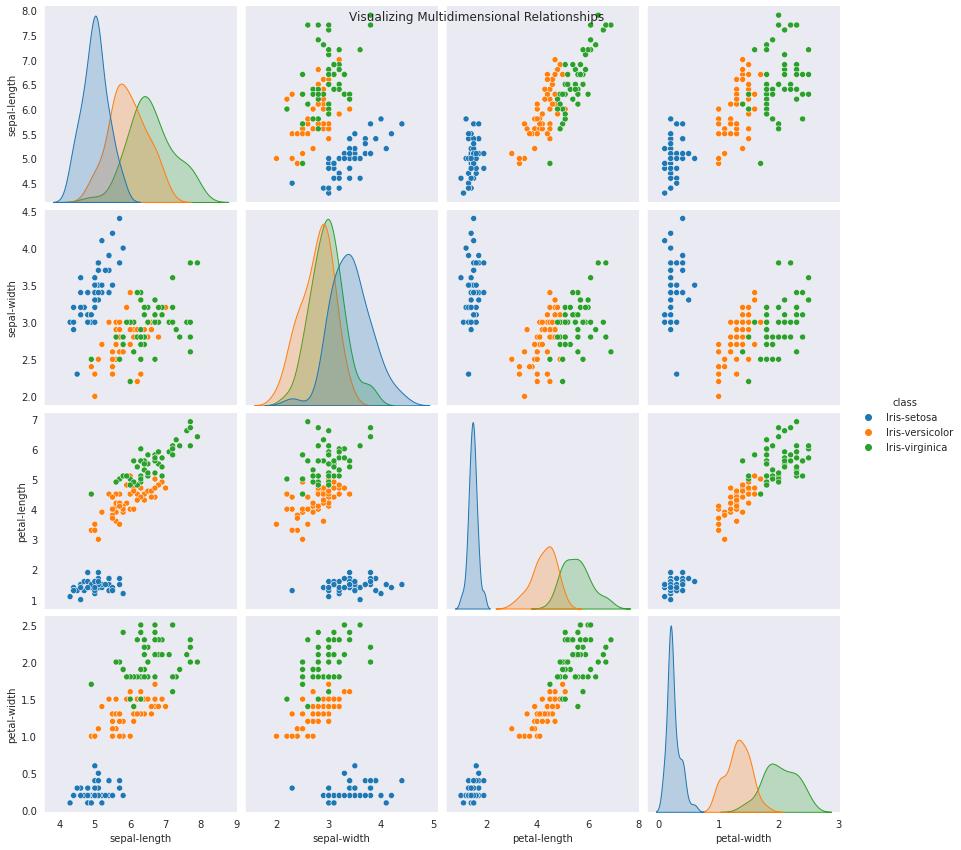

In [5]:
#scatter_matrix
dataset.columns
sns.pairplot(dataset, hue='class', size=3);
plt.suptitle('Visualizing Multidimensional Relationships')

Text(0.5, 0.98, 'Relationship between continuous variables')

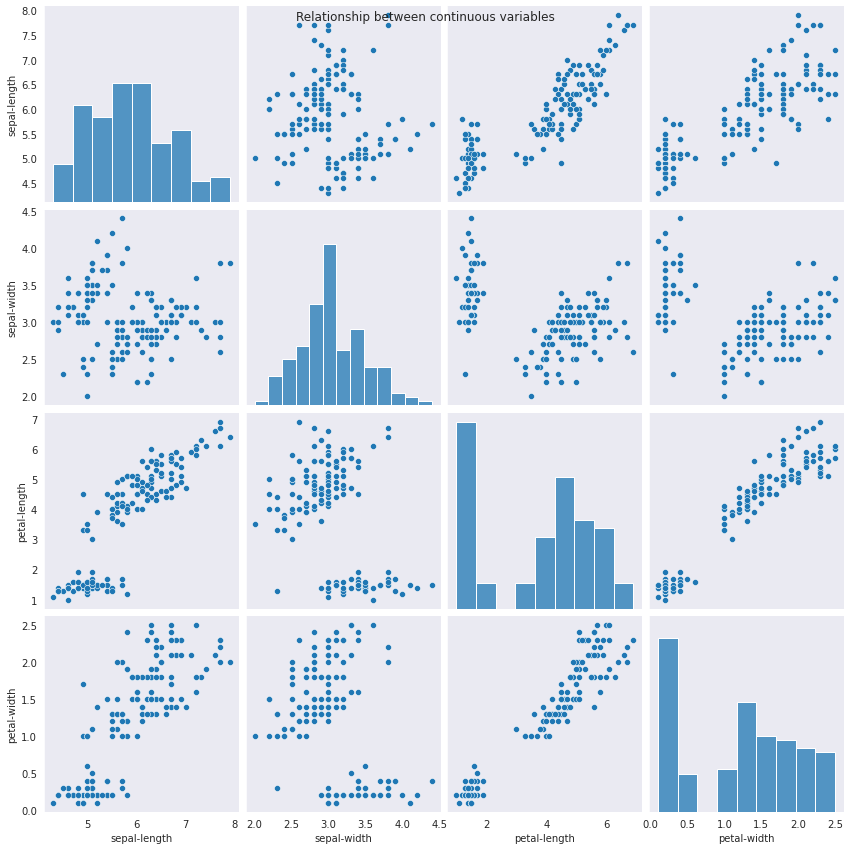

In [6]:
dataset.columns
sns.pairplot(dataset, size=3)
plt.suptitle('Relationship between continuous variables')

Text(0.5, 0.98, 'Univariate analysis on continuous variables')

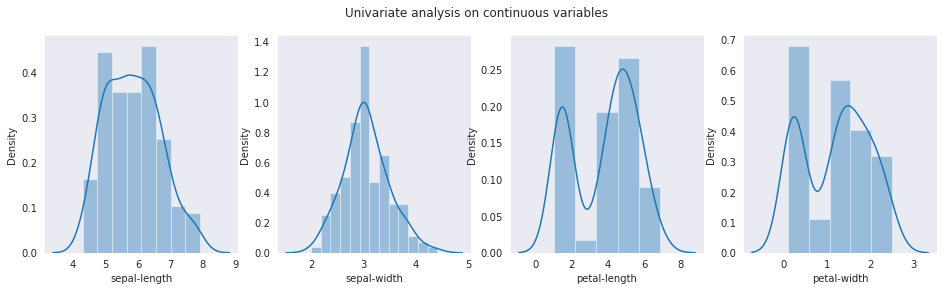

In [7]:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
continuous_features = list(dataset.columns)
continuous_features.remove('class')
axs = axs.ravel()

for ax, colname in zip(axs, continuous_features):
    sns.distplot(dataset[colname], ax=ax)
    
plt.suptitle('Univariate analysis on continuous variables')

Text(0.5, 0.98, 'Correlation between Variables and Class')

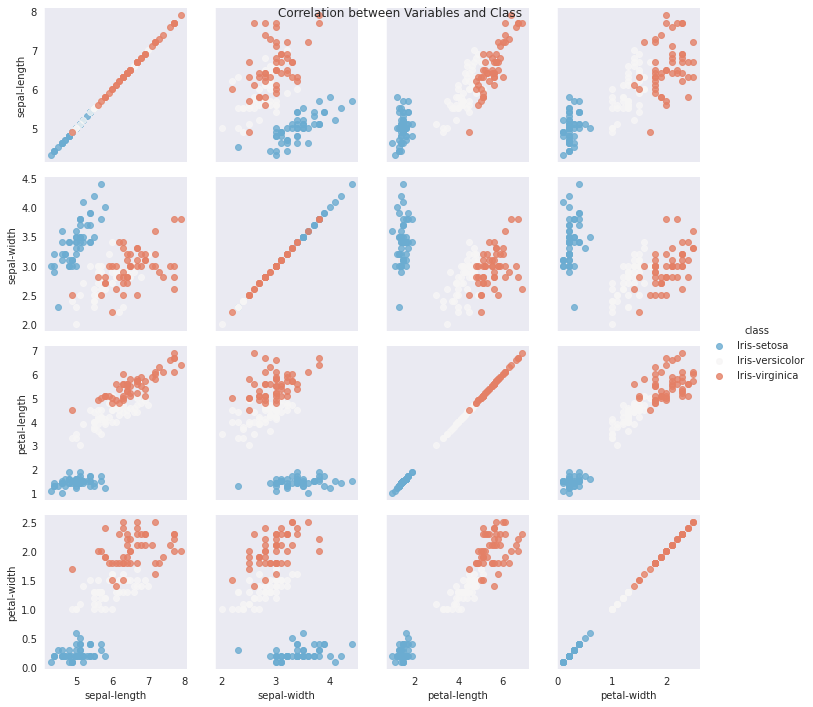

In [8]:
g = sns.PairGrid(dataset, vars= ['sepal-length', 'sepal-width', 'petal-length','petal-width'], hue='class', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();
plt.suptitle('Correlation between Variables and Class')

Text(0.5, 0.98, 'Correlation Matrix')

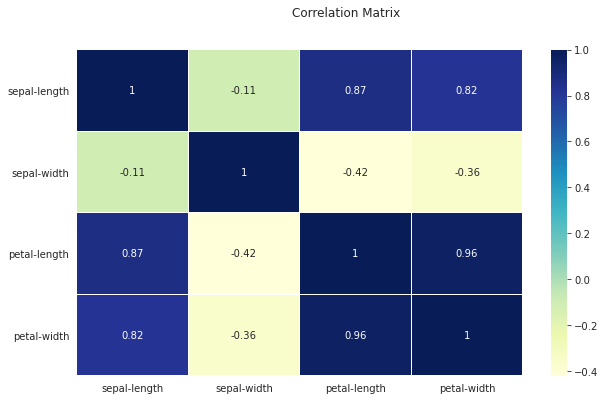

In [9]:
#create the correlation matrix heat map
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);
plt.suptitle('Correlation Matrix')

**The joint distribution between different datasets, along with the associated marginal distributions**

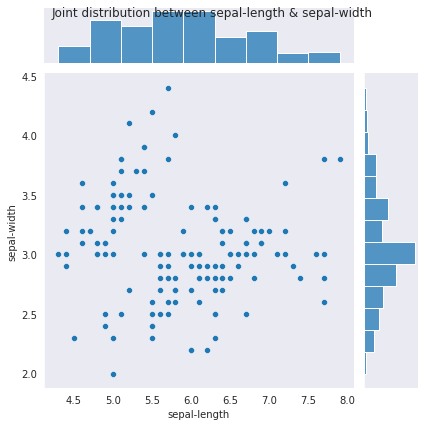

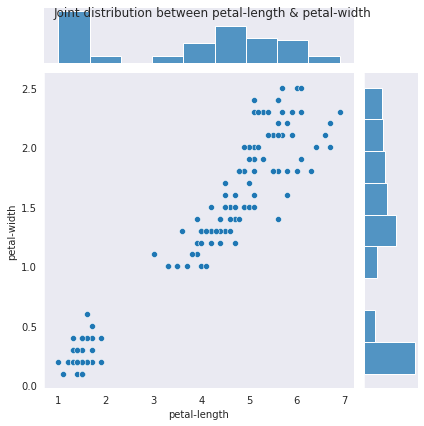

In [10]:
sns.jointplot(dataset['sepal-length'], dataset['sepal-width'])
plt.suptitle('Joint distribution between sepal-length & sepal-width')
plt.show()

sns.jointplot(dataset['petal-length'], dataset['petal-width'])
plt.suptitle('Joint distribution between petal-length & petal-width')
plt.show()

**A categorical scatterplot ith non-overlapping point**

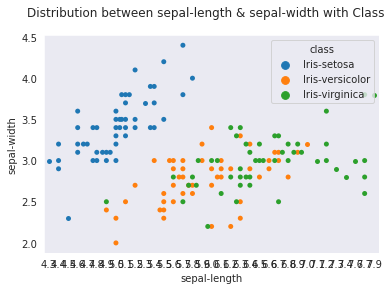

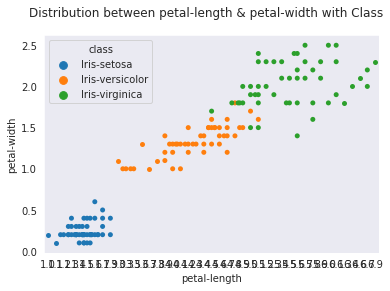

In [11]:
sns.swarmplot(dataset['sepal-length'], dataset['sepal-width'], dataset['class'])
plt.suptitle('Distribution between sepal-length & sepal-width with Class')
plt.show()

sns.swarmplot(dataset['petal-length'], dataset['petal-width'], dataset['class'])
plt.suptitle('Distribution between petal-length & petal-width with Class')
plt.show()

**Showing point estimation (using error bars) and confidence intervals using scatter plot**

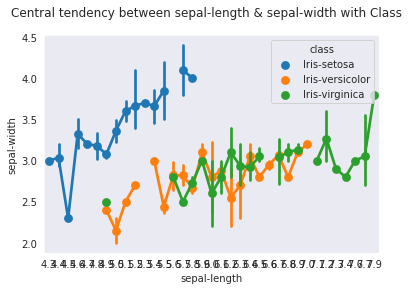

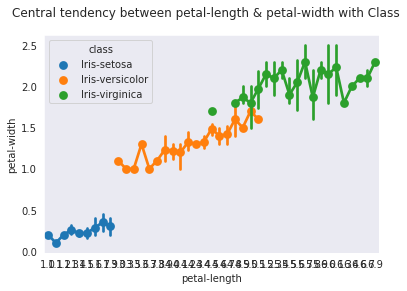

In [12]:
sns.pointplot(dataset['sepal-length'], dataset['sepal-width'], dataset['class'])
plt.suptitle('Central tendency between sepal-length & sepal-width with Class')
plt.show()

sns.pointplot(dataset['petal-length'], dataset['petal-width'], dataset['class'])
plt.suptitle('Central tendency between petal-length & petal-width with Class')
plt.show()

In [13]:
#Split dataset

array = dataset.values
X = array[:, 0:4]
Y = array[:, 4]

In [14]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

model.fit(X, Y)
y_pred = model.predict(X)
accuracy_score(Y, y_pred)

1.0

Wait what!! Accuracy score of 1.0, which indicates that 100%!!!
Let's do some Model validation via cross-validation.

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
cross_val_score(model, X, Y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

Seems Overfitted??? Let's perform cross-validation to compute the validation curve for a class of model.
Ref. https://jakevdp.github.io/PythonDataScienceHandbook/

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [17]:
def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    Y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        Y += err * rng.randn(N)
    return X, Y

X, Y = make_data(40)

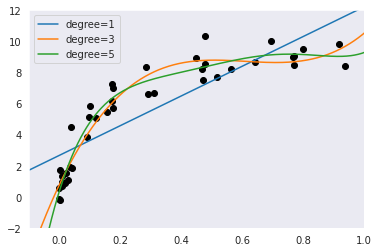

In [18]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), Y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, Y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

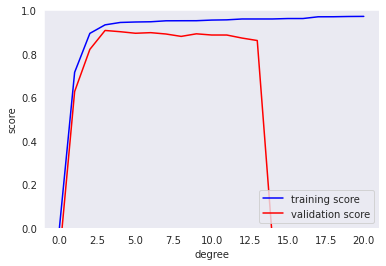

In [19]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, Y, 'polynomialfeatures__degree', degree, cv=5)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

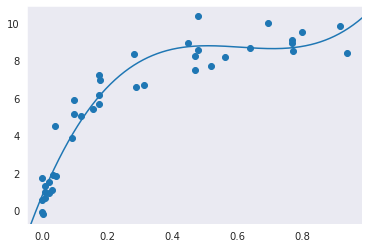

In [20]:
#Learning Rate
plt.scatter(X.ravel(), Y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, Y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

**Hope you liked this notebook, perhaps in future more updates will be added as per suggestions. Any suggestion will be highly appreciated.**

***For more exciting notebooks visit my Kaggle workspace!***  [ https://www.kaggle.com/pankajbhowmik ]